## Regression diagnostics

### Estimate a regression model

In [2]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Load data
url = 'http://vincentarelbundock.github.io/Rdatasets/csv/HistData/Guerry.csv'
dat = pd.read_csv(url)

In [3]:
dat.head()

,Unnamed: 0,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,1,E,Ain,28870,15890,37,5098,33120,35039,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,2,N,Aisne,26226,5521,51,8901,14572,12831,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,3,C,Allier,26747,7925,13,10973,17044,114121,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [5]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data = dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 28 Aug 2018   Prob (F-statistic):           1.90e-08
Time:                        22:38:32   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

### Normality of the residuals

Jarque-Bera test:

In [6]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 3.39360802484318),
 ('Chi^2 two-tail prob.', 0.18326831231663254),
 ('Skew', -0.4865803431122347),
 ('Kurtosis', 3.003417757881634)]

Omni test:

In [7]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 3.7134378115971933), ('Two-tail probability', 0.15618424580304735)]

### Influence test

In [8]:
from statsmodels.stats.outliers_influence import OLSInfluence

test_class = OLSInfluence(results)
test_class.dfbetas[:5, :]

array([[-0.00301154,  0.00290872,  0.00118179],
       [-0.06425662,  0.04043093,  0.06281609],
       [ 0.01554894, -0.03556038, -0.00905336],
       [ 0.17899858,  0.04098207, -0.18062352],
       [ 0.29679073,  0.21249207, -0.3213655 ]])

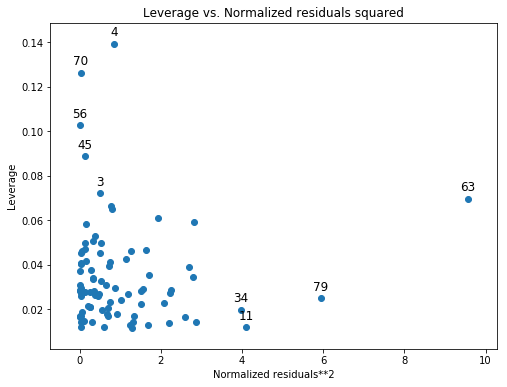

In [13]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(results, ax=ax)

### Multicollinearity

Condition number

In [14]:
np.linalg.cond(results.model.exog)

702.1792145490067

### Heteroskedasticity tests

Breush-Pagan test:

In [16]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breushpagan(results.resid, results.model.exog)
lzip(name, test)

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  


[('Lagrange multiplier statistic', 4.893213374093995),
 ('p-value', 0.08658690502352048),
 ('f-value', 2.5037159462564587),
 ('f p-value', 0.08794028782672857)]

Goldfeld-Quandt test

In [17]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 1.1002422436378148), ('p-value', 0.3820295068692508)]

### Linearity

Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct:

In [18]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(results)
lzip(name, test)

[('t value', -1.0796490077756253), ('p value', 0.2834639247570793)]